<a href="https://colab.research.google.com/github/Jatinnagar777/demo/blob/main/MNIST_digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

#Datasets

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
type(x_train)

numpy.ndarray

In [4]:
# Shape of the numpy array
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60000 images

Test data = 10000 images

Image dimension--> 28x28

Grayscale Image--> 1 channel

In [5]:
# print the 10th image
print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
print(x_train[10].shape)

(28, 28)


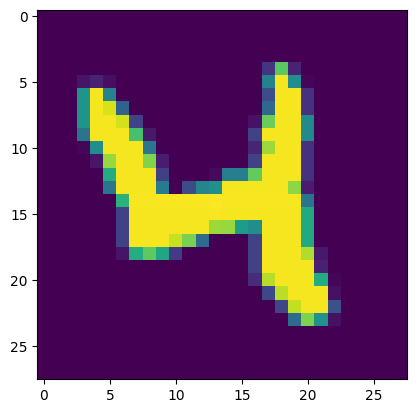

4


In [7]:
# displaying the image
plt.imshow(x_train[20])
plt.show()

# print the corresponding data
print(y_train[20])

Image label

In [8]:
# Unique values in y_train
print(np.unique(y_train))

# Unique values in y_test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


All the images have the same dimensions in this dataset, If not, we have to resize all the images to a common dimension

In [9]:
# Scaling the values
x_train = x_train/255
x_test = x_test/255

In [10]:
# Printing the 10th image
print(x_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural Network

In [11]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

In [17]:
# Compiling the neural network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
# training the neural network
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3698 - accuracy: 0.8931
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1644 - accuracy: 0.9515
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1243 - accuracy: 0.9629
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1016 - accuracy: 0.9695
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0869 - accuracy: 0.9735
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0741 - accuracy: 0.9772
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0659 - accuracy: 0.9796
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0596 - accuracy: 0.9811
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0521 - accuracy: 0.9834
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.047

Accuracy on test data

In [19]:
loss, accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1034 - accuracy: 0.9717


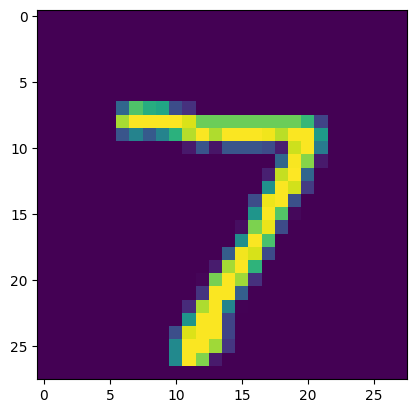

In [20]:
# first data point in x_test
plt.imshow(x_test[0])
plt.show()

In [21]:
print(y_test[0])

7


In [22]:
y_pred = model.predict(x_test)

313/313 [==============================] - 2s 5ms/step


In [24]:
print(y_pred.shape)

(10000, 10)


In [25]:
print(y_pred[0])

[0.40015686 0.9605195  0.99998283 0.99999917 0.39266238 0.9997867
 0.00139693 1.         0.99996936 0.99909323]


model.predict() gives the prediction probablity of each class for that data point

In [26]:
# converting the prediction probabilities to class label
label_for_first_image = np.argmax(y_pred[0])
print(label_for_first_image)

7


In [27]:
# converting the prediction probabilities to class label for all test data points
y_pred_label = [np.argmax(i) for i in y_pred]
print(y_pred_label)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 7, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 5, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 3, 8, 9, 3, 3, 4, 6, 4, 3, 0, 7, 0, 2, 7, 1, 7, 3, 2, 9, 3, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 3, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 3, 4, 7, 6, 4, 9, 0, 5, 3, 5, 6, 5, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 3, 0, 1, 1, 1, 0, 9, 0, 3, 1, 5, 4, 2, 3, 6, 1, 1, 1, 3, 5, 5, 2, 9, 4, 5, 3, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 3, 7, 9, 2, 2, 4, 1, 5, 5, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 3, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 5, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Confusion Matrix

In [29]:
conf_mat = confusion_matrix(y_test, y_pred_label)
print(conf_mat)

tf.Tensor(
[[ 960    0    1    2    1    6    9    0    1    0]
 [   0 1125    3    1    0    0    2    0    4    0]
 [   1   21  989    5    1    0    2    6    6    1]
 [   0    4   36  950    0    7    0    4    9    0]
 [   1    1    0    1  964    2    7    3    0    3]
 [   2    1    0  119    0  765    4    0    0    1]
 [   2    2    9    1   30   84  830    0    0    0]
 [   1    6   38   67    4   26    0  874    4    8]
 [   4    1   21   40    8   52    4    2  838    4]
 [   4    4    0   43  115   23    0   29    7  784]], shape=(10, 10), dtype=int32)


Text(0.5, 25.722222222222214, 'Predicted labels')

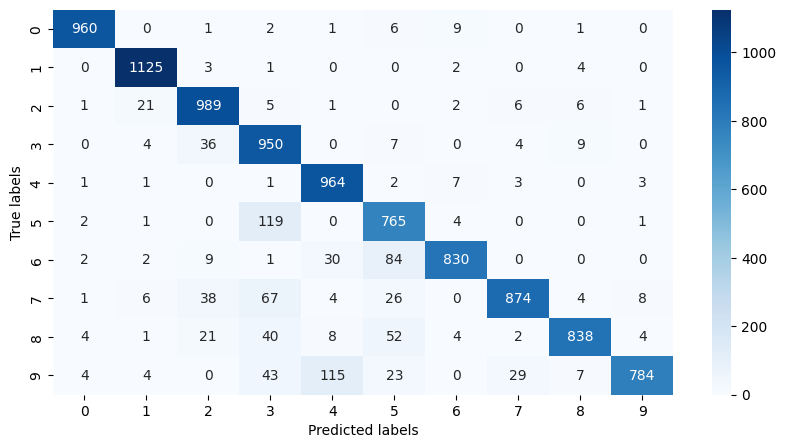

In [37]:
plt.figure(figsize=(10, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True labels')
plt.xlabel('Predicted labels')

Buliding a Predictive system

In [55]:
input_image = cv2.imread('digit.webp')

In [56]:
type(input_image)

numpy.ndarray

In [57]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


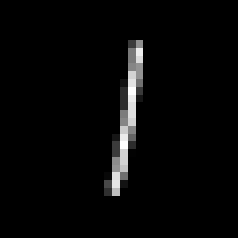

In [58]:
cv2_imshow(input_image)

In [59]:
input_image.shape

(238, 238, 3)

In [60]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [61]:
grayscale.shape

(238, 238)

In [62]:
input_image_resize = cv2.resize(grayscale, (28, 28))

In [63]:
input_image_resize.shape

(28, 28)

In [64]:
cv2_imshow(input_image_resize)

In [65]:
input_image_resize = input_image_resize/255

In [66]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [67]:
input_pred = model.predict(image_reshaped)
print(input_pred)

1/1 [==============================] - 0s 35ms/step
[[0.11177418 0.9999147  0.5915116  0.92650414 0.99500746 0.89531547
  0.23024051 0.99498665 0.9414736  0.9945226 ]]


In [68]:
input_pred_label = np.argmax(input_pred)
print(input_pred_label)

1


**Predictive System**

Path of the image to be predicted: /content/digit.webp


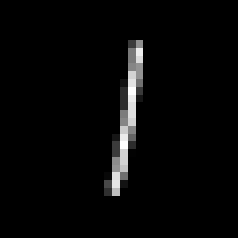

1/1 [==============================] - 0s 22ms/step
The Handwritten digit recognised as  1


In [70]:
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
input_image_resize = cv2.resize(grayscale, (28, 28))
input_image_resize = input_image_resize/255
image_reshaped = np.reshape(input_image_resize, [1,28,28])
input_pred = model.predict(image_reshaped)
input_pred_label = np.argmax(input_pred)
print('The Handwritten digit recognised as ', input_pred_label)